# Imbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### First, download the data from: https://drive.google.com/uc?id=1oRNf2muX8VLH8ky5F_cTgGYbHlD-ZwVK&export=download. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

data= pd.read_csv(r'C:\Users\matui\Downloads\paysim.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
data.step.value_counts()

19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: step, Length: 743, dtype: int64

In [6]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

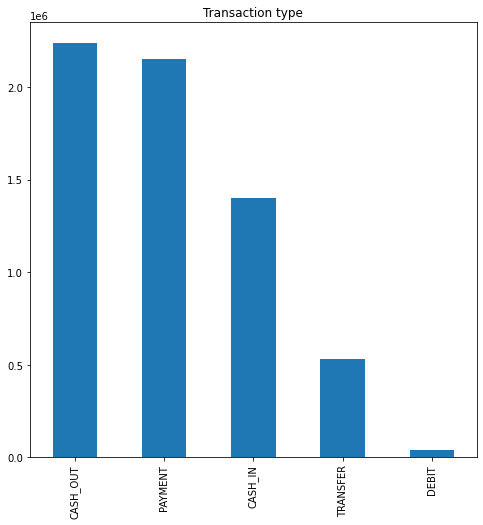

In [7]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
data.type.value_counts().plot(kind='bar', title="Transaction type", ax=ax, figsize=(8,8))
plt.show()

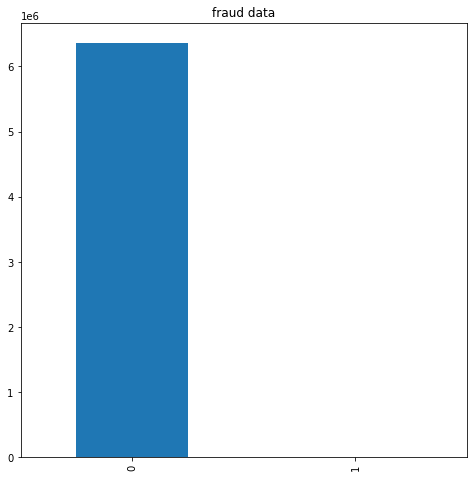

In [8]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
data.isFraud.value_counts().plot(kind='bar', title="fraud data", ax=ax, figsize=(8,8))
plt.show()

In [9]:
data.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

C:\Users\matui\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='isFraud', ylabel='Density'>

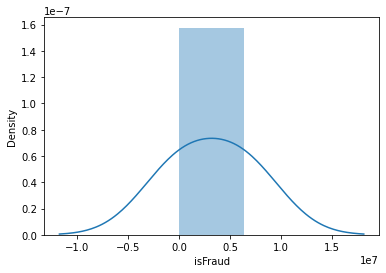

In [10]:
sns.distplot(data.isFraud.value_counts())


In [11]:
# the data is highly imbalanced

### What is the distribution of the outcome? 

In [12]:
# Your response here
#the distribution is right skewed

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [13]:
# Your code here
#The step represents each hour. Can be accepted as a time variable. 
#It starts at 1, so it might be understood like first hour, second etc. 

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [15]:
#Number of unique values
data.nameDest.nunique()

2722362

In [16]:
#Number of unique values
data.nameOrig.nunique()

6353307

In [17]:
numcol = list(data.describe().columns)

for x in numcol:
    Q3 = data[x].quantile(0.75)
    Q1= data[x].quantile(0.25)
    IQR = Q3 - Q1
    filters = data[data[x]>Q3 + 1.5*IQR]
    print('Column', x)
    print('Number of outliers', len(filters))
    print('Percentage of outliers', "{:.1f}".format((len(filters)/len(data[x]))*100))
    print('\n')

Column step
Number of outliers 102688
Percentage of outliers 1.6


Column amount
Number of outliers 338078
Percentage of outliers 5.3


Column oldbalanceOrg
Number of outliers 1112507
Percentage of outliers 17.5


Column newbalanceOrig
Number of outliers 1053391
Percentage of outliers 16.6


Column oldbalanceDest
Number of outliers 786135
Percentage of outliers 12.4


Column newbalanceDest
Number of outliers 738527
Percentage of outliers 11.6


Column isFraud
Number of outliers 8213
Percentage of outliers 0.1


Column isFlaggedFraud
Number of outliers 16
Percentage of outliers 0.0




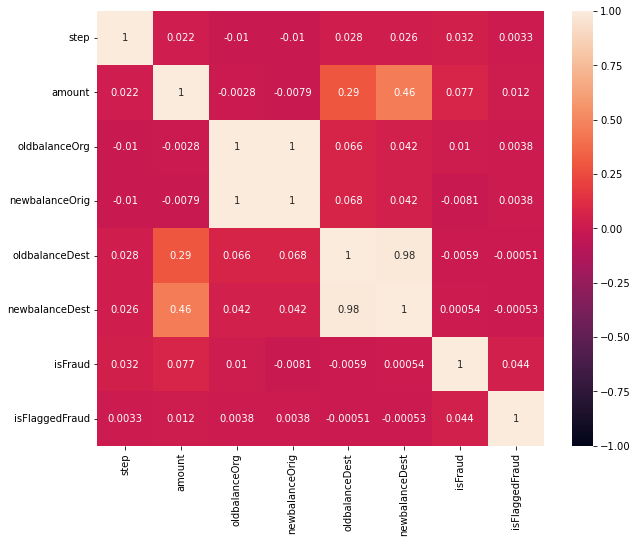

In [19]:
# Corr matrix

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)

In [20]:
#Drop nameOrig and nameDest columns as they both have very high cardinality, dont give alot information to the mode.

data.drop(columns=['nameOrig', 'nameDest'], inplace=True) 

In [21]:
#Encode the dataset to apply model
from sklearn.preprocessing import LabelEncoder

lbl_ebcode = LabelEncoder()
data.type = lbl_ebcode.fit_transform(data.type)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
 8   isFlaggedFraud  int64  
dtypes: float64(5), int32(1), int64(3)
memory usage: 412.6 MB


### Run a logisitc regression classifier and evaluate its accuracy.

In [23]:
# Your code here

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Define x and y
y=data['isFraud']
x= data.drop(columns='isFraud')

#Scaler the data
x = StandardScaler().fit_transform(x)

#Split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)

#Run model
lr = LogisticRegression()
lr.fit(x_train, y_train)

#Get predictions
y_pred = lr.predict(x_test)

In [24]:
#Run test
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score, roc_auc_score

print('Accuracy score: ', accuracy_score(y_test,y_pred))
print('Precision score: ', precision_score(y_test,y_pred))
print('Confusion matrix: ',confusion_matrix(y_test,y_pred))
print('f1_score: ', f1_score(y_test,y_pred))
print('Recall score: ', recall_score(y_test,y_pred))
print('ROC_AUC: ', roc_auc_score(y_test,y_pred))

Accuracy score:  0.9992369495585152
Precision score:  0.9197278911564626
Confusion matrix:  [[1270877      59]
 [    912     676]]
f1_score:  0.5820060266896255
Recall score:  0.4256926952141058
ROC_AUC:  0.7128231363674624


### Now pick a model of your choice and evaluate its accuracy.

In [25]:
# Your code here
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1)
rf.fit(x_train, y_train)
y_pred2 = rf.predict(x_test)

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score, roc_auc_score

print('Accuracy score: ', accuracy_score(y_test,y_pred2))
print('Precision score: ', precision_score(y_test,y_pred2))
print('Confusion matrix: ', confusion_matrix(y_test,y_pred2))
print('f1_score: ', f1_score(y_test,y_pred2))
print('Recall score: ', recall_score(y_test,y_pred2))
print('ROC_AUC: ', roc_auc_score(y_test,y_pred2))

Accuracy score:  0.9996754481644354
Precision score:  0.9749393694421988
Confusion matrix:  [[1270905      31]
 [    382    1206]]
f1_score:  0.8538053097345132
Recall score:  0.7594458438287154
ROC_AUC:  0.8797107261783017


### Which model worked better and how do you know?

In [2]:
# Your response here


### Let's use NearMiss method for undersampling and compare the results with previous

In [27]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [28]:
from imblearn.under_sampling import NearMiss

undersample = NearMiss(version=1, n_neighbors=3)

# transform the dataset
x_nm, y_nm = undersample.fit_resample(x, y)

### And now let's apply SMOTE

In [29]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
# transform the dataset
x_sm, y_sm = oversample.fit_resample(x, y)

### Apply your model on improved data

In [30]:
# NearMiss data transform
x_train_nm, x_test_nm, y_train_nm, y_test_nm = train_test_split(x_nm, y_nm, test_size= 0.2)

print(x_train_nm.shape, x_test_nm.shape, y_train_nm.shape, y_test_nm.shape)

(13140, 8) (3286, 8) (13140,) (3286,)


In [31]:
# SMOTE data transform
x_train_sm, x_test_sm, y_train_sm, y_test_sm = train_test_split(x_sm, y_sm, test_size= 0.2)

print(x_train_sm.shape, x_test_sm.shape, y_train_sm.shape, y_test_sm.shape)

(10167051, 8) (2541763, 8) (10167051,) (2541763,)


In [32]:
#Logistic regression with NearMiss data
lr = LogisticRegression()

lr.fit(x_train_nm, y_train_nm)
y_pred_nm = lr.predict(x_test_nm)

In [33]:
#Logistic regression with SMOTE data
lr = LogisticRegression()

lr.fit(x_train_sm, y_train_sm)
y_pred_sm = lr.predict(x_test_sm)

### Calculate classification report for imbalanced data to evaluate the models

In [34]:
from imblearn.metrics import classification_report_imbalanced

print('Logistic regression:')
print(classification_report_imbalanced(y_test, y_pred))

print('\nLogistic regression after Near Miss:')
print(classification_report_imbalanced(y_test_nm, y_pred_nm))

print('\nLogistic regression after SMOTE:')
print(classification_report_imbalanced(y_test_sm, y_pred_sm))

Logistic regression:
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      0.43      1.00      0.65      0.45   1270936
          1       0.92      0.43      1.00      0.58      0.65      0.40      1588

avg / total       1.00      1.00      0.43      1.00      0.65      0.45   1272524


Logistic regression after Near Miss:
                   pre       rec       spe        f1       geo       iba       sup

          0       0.89      0.97      0.88      0.93      0.92      0.86      1649
          1       0.97      0.88      0.97      0.92      0.92      0.85      1637

avg / total       0.93      0.93      0.92      0.92      0.92      0.85      3286


Logistic regression after SMOTE:
                   pre       rec       spe        f1       geo       iba       sup

          0       0.92      0.97      0.91      0.94      0.94      0.89   1270963
          1       0.97      0.91      0.97      0.94      0.94      0.

### What is your conclusion?